In [ ]:
# HW Module 6
# mchepelva
#

In [ ]:
In this exercise the task is to determine the optimal number of clusters, and to perform clustering on the Iris dataset. Features in the Iris dataset are sepal length, sepal width, petal length and petal width.


 Load the Iris dataset from the sklearn.datasets library.

 Scale the data so that the mean of each feature equals zero and standard deviation equals one (hint: sklearn.preprocessing.StandardScaler).

 Apply PCA and determine the percentage of explained variance for each of the principal components (hint: sklearn.decomposition.PCA).

 Visualize the data using the first two principal components.

 Find the optimal number of clusters using the within-cluster sum of squares. Use the data with reduced dimensionality, i.e. after applying PCA (plot the elbow curve).

 Run k-means clustering with the optimal number of clusters (hint: sklearn.cluster.KMeans).

 Plot the clusters.

In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import plotly.express as px
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [4]:
# Load the Iris data
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
labels = dataset.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [52]:
sc = StandardScaler()
X = sc.fit_transform(df)
print(X[:2,:3])
#print(Z[:2,:3])

[[-0.90068117  1.01900435 -1.34022653]
 [-1.14301691 -0.13197948 -1.34022653]]
[[-2.26470281  0.4800266  -0.12770602]
 [-2.08096115 -0.67413356 -0.23460885]]


Varience explained: [0.72962445 0.22850762 0.03668922 0.00517871]


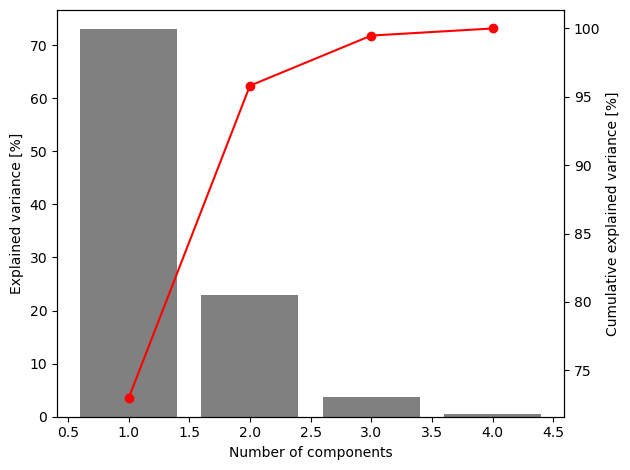

In [27]:
# Fit PCA on input data
pca = PCA()
Z = pca.fit_transform(X)
print("Varience explained:", pca.explained_variance_ratio_)

fig, ax1 = plt.subplots()
# Plot explained variance per principal component
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance [%]')
ax1.bar(range(1, X.shape[1]+1), pca.explained_variance_ratio_*100, color='gray')
ax1.tick_params(axis='y')
    
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
    
# Plot cumulative explained variance on the same plot 
ax2.set_ylabel('Cumulative explained variance [%]')
ax2.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_*100), marker='o', color='red')
ax2.tick_params(axis='y')
    
plt.tight_layout()
plt.show()

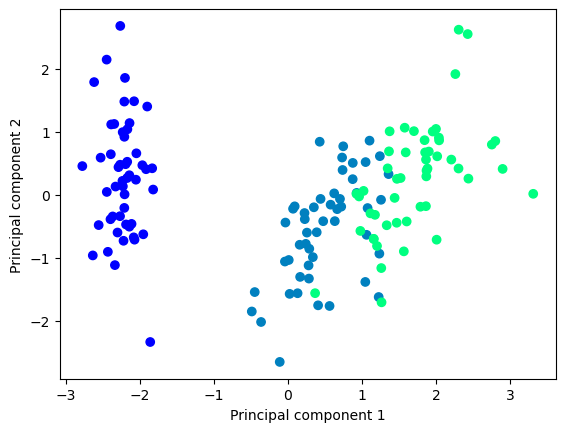

In [31]:
# Plot in PCs
plt.scatter(Z[:,0], Z[:,1], c=labels, cmap='winter')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()
#plt.legend_elements

In [53]:
# Nice plot in PCs 
labels_vec = dataset.target_names[dataset.target]
fig = px.scatter(x=Z[:,0], y=Z[:,1], color=labels_vec,
                labels={
                     "x": "PC 1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100),
                     "y": "PC 2 (%.2f%%)" % (pca.explained_variance_ratio_[1]*100),
                     "color": "Species"
                 },
                template = 'plotly_white')
fig.show()

In [65]:
def wcss(X, max_nclast, random_state, init):
    # Find optimal number of clusters via within-cluster sum of squares
    wcss = [] 
    for num_clusters in range(1, max_nclast): 
        model = KMeans(n_clusters=num_clusters, random_state=random_state, init=init, n_init='auto')
        model.fit(X) 
        # intertia_ - sum of squared distances of samples to their closest cluster center
        wcss.append(model.inertia_)
    
    # Plot elbow curve
    plt.plot(range(1, max_nclast), wcss, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within cluster sum of squares')
    plt.tight_layout()
    plt.show()

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory le

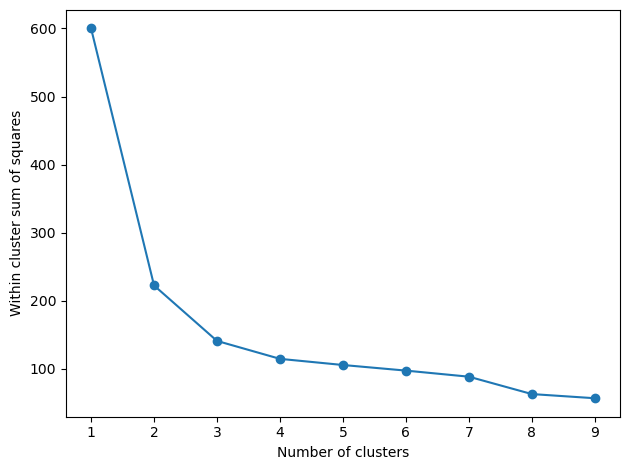

In [66]:
# Plot elbow curve
#'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution 
# of the points' contribution to the overall inertia. 
init = 'k-means++' 
random_state=1
max_nclast = 10
wcss(Z, max_nclast, random_state, init)

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.




Number of iterations: 7


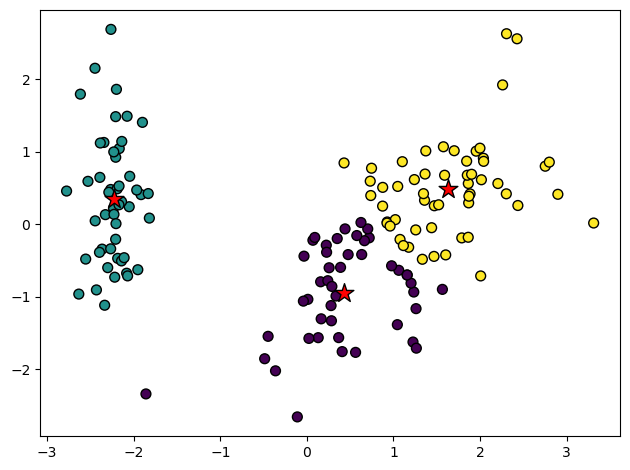

In [67]:
n_clust=3
model = KMeans(n_clusters=n_clust, init=init, random_state=1, n_init='auto') 
k_means = model.fit(Z)
print('\nNumber of iterations:', model.n_iter_)
    
# Plot the clusters
plt.scatter(x = Z[:,0], y = Z[:,1], c=model.labels_, marker='o', edgecolor='black', s=50)
# Plot the cluster centers
plt.scatter(k_means.cluster_centers_[:, 0],
                k_means.cluster_centers_[:, 1],
                s=200, marker='*',
                c='red', edgecolor='black',
                label='centroids')
plt.tight_layout()
plt.show()

In [70]:
#Plotly plot (color by original labels)
fig = px.scatter(x=Z[:,0], y=Z[:,1], color=labels_vec, symbol = model.labels_,
                labels={
                     "x": "PC 1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100),
                     "y": "PC 2 (%.2f%%)" % (pca.explained_variance_ratio_[1]*100),
                     "color": "Species",
                    "symbol": "predicted cluster"
                 },
                template = 'plotly_white')
fig.show()